In [ ]:
This report presents an exploratory data analysis (EDA) of the Sample Superstore dataset. The objective is to
understand sales performance, profitability patterns, and the impact of discounts across different regions and product
categories. EDA helps uncover hidden patterns and supports data-driven business decisions.

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
print(df.columns)

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


In [14]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
The dataset contains no missing values, which ensures data completeness and improves the reliability of the analysis.

In [15]:
df.duplicated().sum()

np.int64(17)

In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


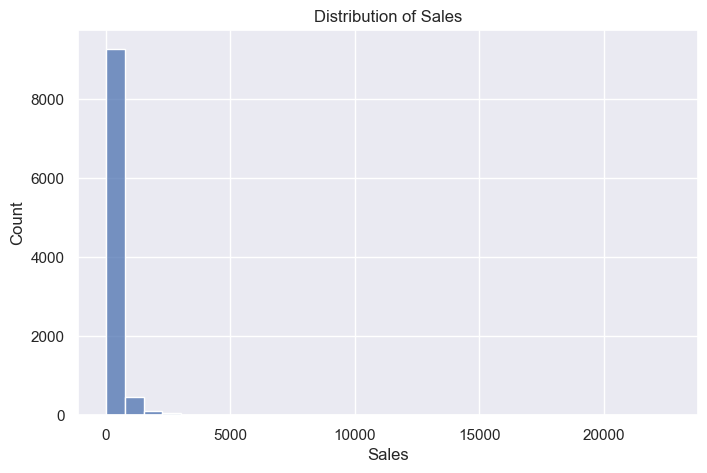

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=30)
plt.title("Distribution of Sales")
plt.show()

In [ ]:
The sales distribution is right-skewed, meaning most transactions generate low to moderate sales, while a few
transactions contribute very high sales values. This indicates that a small number of large orders significantly
impact total revenue.

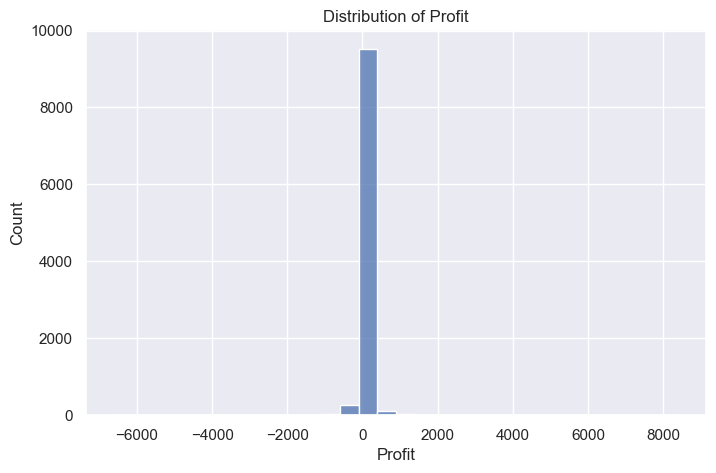

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['Profit'], bins=30)
plt.title("Distribution of Profit")
plt.show()

In [ ]:
The profit distribution includes both positive and negative values, showing that some transactions result in losses.
Many observations are concentrated near zero, indicating relatively small profit margins for most sales.

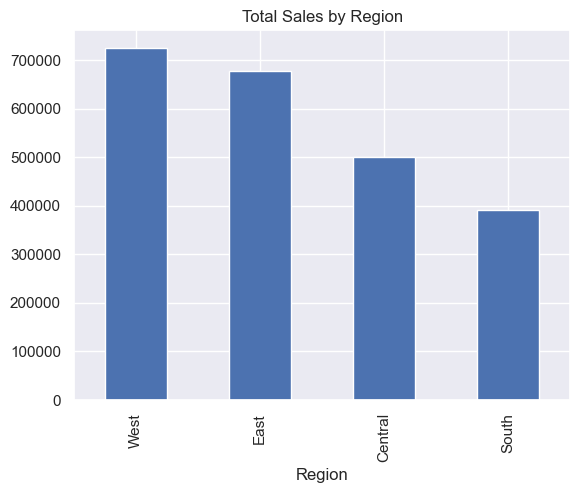

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

In [10]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

region_sales.plot(kind='bar')
plt.title("Total Sales by Region")
plt.show()

region_sales

In [ ]:
Sales vary significantly across regions, with the West region generating the highest revenue and the South region
the lowest. This suggests geographical differences in sales performance.

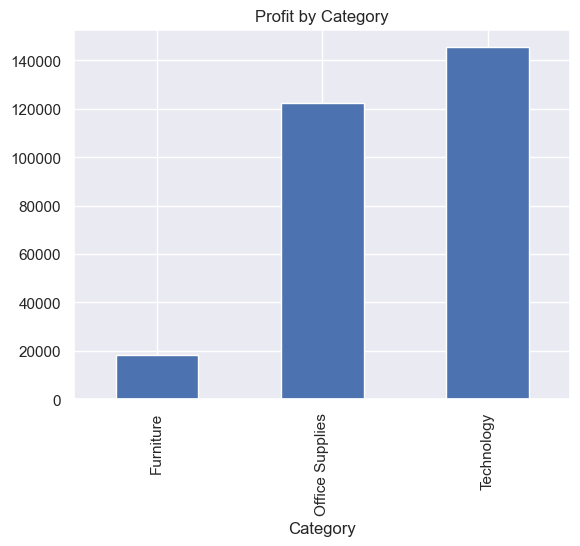

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

In [11]:
category_profit = df.groupby('Category')['Profit'].sum().sort_values()

category_profit.plot(kind='bar')
plt.title("Profit by Category")
plt.show()

category_profit

In [ ]:
Technology is the most profitable category, while Furniture generates the lowest profit. This suggests differences 
in cost structure, pricing strategy, or discount impact across product categories.

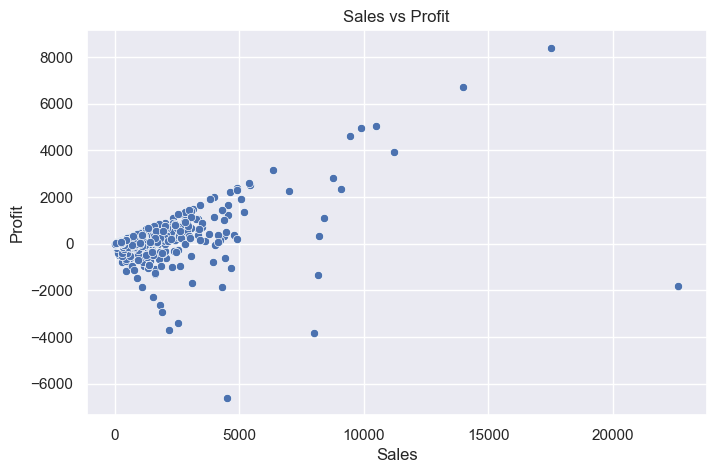

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title("Sales vs Profit")
plt.show()

In [ ]:
A positive relationship exists between sales and profit; however, some high-sales transactions result in negative
profit. This indicates that factors such as discount strategy may significantly impact profitability.

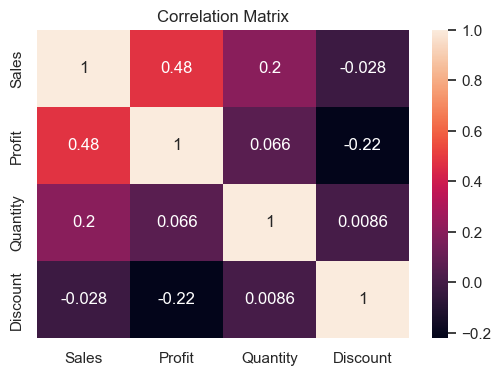

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales','Profit','Quantity','Discount']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
Sales and profit have a moderate positive correlation, while discount shows a negative relationship with profit. 
This suggests that excessive discounting may reduce overall profitability.

In [ ]:
The analysis shows that while higher sales generally lead to higher profit, discount has a
negative relationship with profit. This suggests that excessive discount strategies may reduce
profitability. Certain categories perform better than others, indicating opportunities for
strategic product focus.